In [1]:
import warnings
# ignore warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import mglearn
import matplotlib.pyplot as plt

## K-Nearest Neighbors

X.shape: (26, 2)
y.shape: (26,)


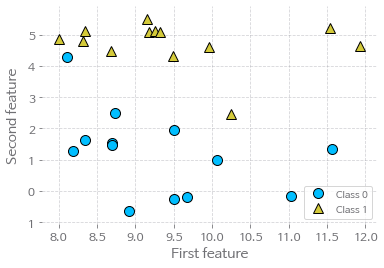

In [56]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print(f"X.shape: {X.shape}")
print(f"y.shape: {y.shape}")

### K-Neighbors **Classification**

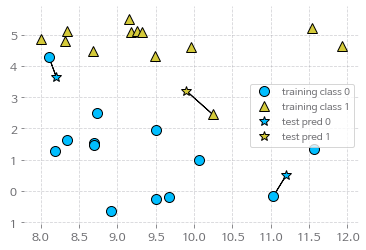

In [57]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

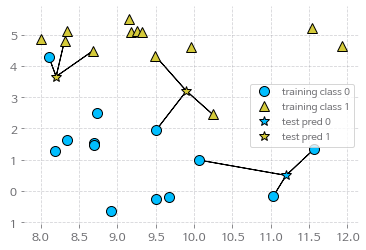

In [58]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

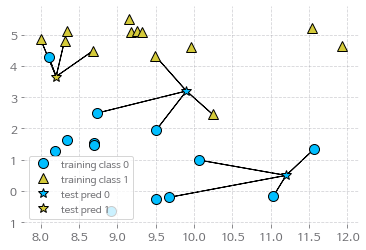

In [59]:
mglearn.plots.plot_knn_classification(n_neighbors=4)

## Sklearn

In [60]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [61]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [62]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [63]:
print(f"Test set predictions: {clf.predict(X_test)}")

Test set predictions: [1 0 1 0 1 0 0]


In [64]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


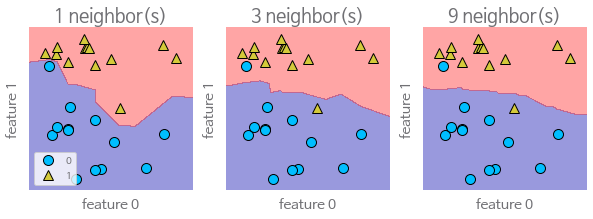

In [65]:
fig, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(f"{n_neighbors} neighbor(s)")
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

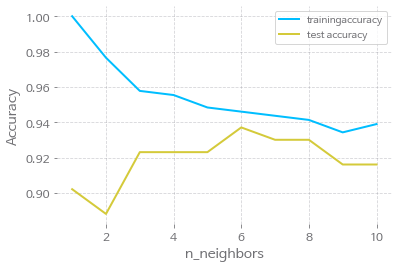

In [66]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="trainingaccuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

overfitting? vs underfitting?

### K-Neighbors **Regression**

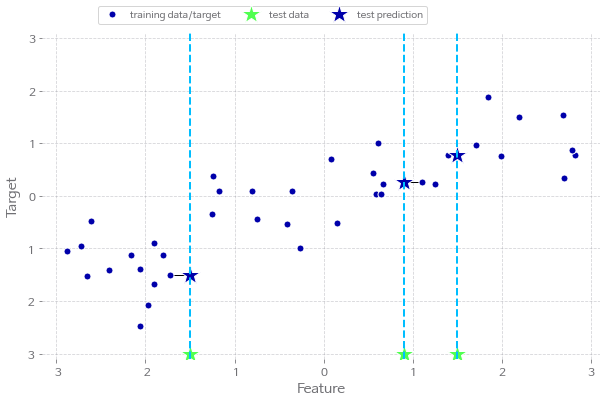

In [3]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

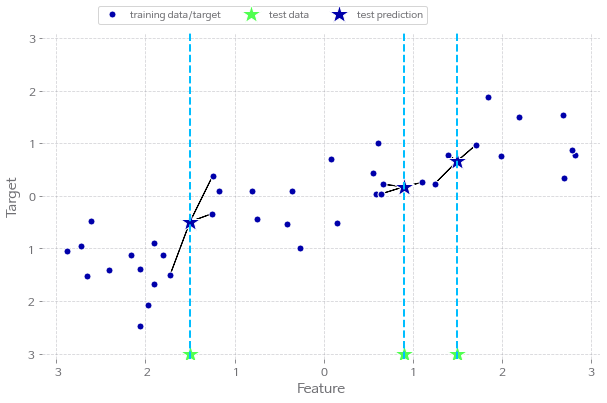

In [4]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [10]:
reg.score(X_test, y_test)

0.8344172446249605

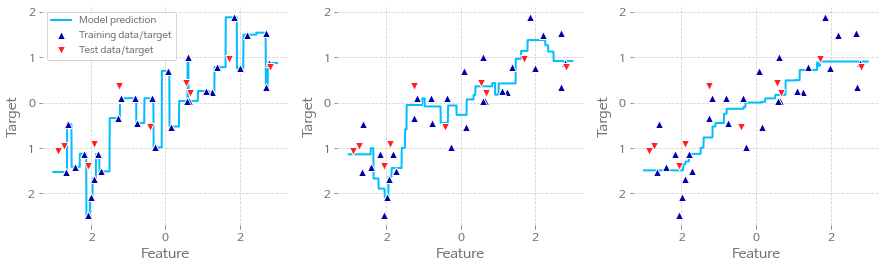

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    
axes[0].legend(["Model prediction", "Training data/target", "Test data/target"], loc="best")